# Assignment 3(b)

### Q1: Write two layer neural network code using feed forward learning and sigmoid activation function for iris dataset

In [ ]:
import numpy as np
import pandas as pd
#import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
%matplotlib inline

In [2]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names=['sepal-length','sepal-width','petal-length','petal-width','Class']
iris=pd.read_csv(url,names=names)
iris.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.Class.replace(['Iris-setosa','Iris-virginica','Iris-versicolor'],[0,1,2],inplace=True)
#iris.loc[iris.Class=='setosa','Class']=0
#iris.loc[iris.Class=='versicolor','Class']=1
#iris.loc[iris.Class=='virginica','Class']=2
iris.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
def sigmoid(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

def normalize(X,axis=-1,order=2):
    l2=np.atleast_1d(np.linalg.norm(X,order,axis))
    l2[l2==0]=1
    return X/np.expand_dims(12,axis)
def to_one_hot(Y):
    print(y)
    n_col=np.max(Y)+1
    binarized=np.zeros((len(Y),n_col))
    for i in range(len(Y)):
        binarized[i,Y[i]]=1.
    return binarized
def from_one_hot(y):
    arr=np.zeros((len(y),1))
    for i in range(len(Y)):
        l=layer2[i]
        for j in range(len(l)):
            if(l[j]==1):
                arr[i]=j+1
    return arr

In [6]:
columns=['sepal-length','sepal-width','petal-length','petal-width']
x=pd.DataFrame(iris,columns=columns)
x=normalize(x.as_matrix())
print(x)
columns1=['Class']
y=pd.DataFrame(iris,columns=columns1)
y=y.as_matrix()
y=y.flatten()
y=to_one_hot(y)
print(y)

[[0.425      0.29166667 0.11666667 0.01666667]
 [0.40833333 0.25       0.11666667 0.01666667]
 [0.39166667 0.26666667 0.10833333 0.01666667]
 [0.38333333 0.25833333 0.125      0.01666667]
 [0.41666667 0.3        0.11666667 0.01666667]
 [0.45       0.325      0.14166667 0.03333333]
 [0.38333333 0.28333333 0.11666667 0.025     ]
 [0.41666667 0.28333333 0.125      0.01666667]
 [0.36666667 0.24166667 0.11666667 0.01666667]
 [0.40833333 0.25833333 0.125      0.00833333]
 [0.45       0.30833333 0.125      0.01666667]
 [0.4        0.28333333 0.13333333 0.01666667]
 [0.4        0.25       0.11666667 0.00833333]
 [0.35833333 0.25       0.09166667 0.00833333]
 [0.48333333 0.33333333 0.1        0.01666667]
 [0.475      0.36666667 0.125      0.03333333]
 [0.45       0.325      0.10833333 0.03333333]
 [0.425      0.29166667 0.11666667 0.025     ]
 [0.475      0.31666667 0.14166667 0.025     ]
 [0.425      0.31666667 0.125      0.025     ]
 [0.45       0.28333333 0.14166667 0.01666667]
 [0.425      

C:\Users\Vidyajay\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Vidyajay\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33)
w0=2*np.random.random((4,5))-1
w1=2*np.random.random((5,3))-1
n=0.1
errors=[]
print(w0)

[[-0.367143    0.01566766  0.47679581  0.23037172 -0.48021523]
 [-0.53546966 -0.20621238  0.78703323 -0.30883311 -0.19794062]
 [-0.46287909  0.47942559 -0.45807672 -0.10443362 -0.16492173]
 [-0.90471075 -0.93646578 -0.69001476 -0.62122397  0.09556266]]


In [8]:
for i in range(100000):
    layer0=x_train
    layer1=sigmoid(np.dot(layer0,w0))
    layer2=sigmoid(np.dot(layer1,w1))
    
    layer2_error=y_train - layer2
    layer2_delta=layer2_error * sigmoid(layer2,deriv=True)
   
    layer1_error=layer2_delta.dot(w1.T)
    layer1_delta=layer1_error * sigmoid(layer1,deriv=True)
  
    w1 +=layer1.T.dot(layer2_delta)*n
    w0 +=layer0.T.dot(layer1_delta)*n

    error=np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy=(1-error)*100

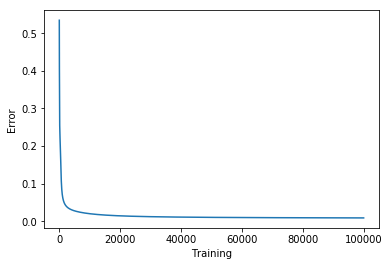

Trianing Accuracy 99.12%


In [9]:
plt.plot(errors)
plt.xlabel('Training')
plt.ylabel('Error')
plt.show()
print("Trianing Accuracy " + str(round(accuracy,2)) + "%")